## Homework 8 [60 POINTS]

### Statement of Non-cheating and honest collaboration:

I have been informed of the academic honesty policies of Georgia State University. I will abide by those policies. I have written up the solutions below by myself and understand what I have turned in. I collaborated and discussed the problems with the following people: ```[insert here]```

Signed,
```Jesse Annan```


### Directions ** IMPORTANT**

- **Change the notebook's name and add your name before submitting.**
- **Do not code your solution. Please provide manual solution.**

## Question 1 [20 Points]

The table below shows the predictions made for a continuous target feature by two different prediction models for a test dataset.

|ID|Target|Model 1 Prediction|Model 2 Prediction|
|---|---|---|---|
|1|2623|2664|2691|
|2|2423|2436|2367|
|3|2423|2399|2412|
|4|2448|2447|2440|
|5|2762|2847|2693|
|6|2435|2411|2493|
|7|2519|2516|2598|
|8|2772|2870|2814|
|9|2601|2586|2583|
|10|2422|2414|2485|
|11|2349|2407|2472|
|12|2515|2505|2584|
|13|2548|2581|2604|
|14|2281|2277|2309|
|15|2295|2280|2296|
|16|2570|2577|2612|
|17|2528|2510|2557|
|18|2342|2381|2421|
|19|2456|2452|2393|
|20|2451|2437|2479|
|21|2296|2307|2290|
|22|2405|2355|2490|
|23|2389|2418|2346|
|24|2629|2582|2647|
|25|2584|2564|2546|
|26|2658|2662|2759|
|27|2482|2492|2463|
|28|2471|2478|2403|
|29|2605|2620|2645|
|30|2442|2445|2478|

#### A) Based on these predictions, calculate the evaluation measures listed below for each model.
    i.  The sum of squared errors [9 Points]
    ii. The R2 measure [9 Points]
#### B) Based on the evaluation measures calculated, which model do you think is performing better for this dataset? [2 Points]

In [1]:
import numpy as np 
import pandas as pd 

q1 = pd.read_csv('q1.csv')
print(q1.columns.to_list())
q1.head()

['ID', 'Target', 'Model 1 Prediction', 'Model 2 Prediction']


,ID,Target,Model 1 Prediction,Model 2 Prediction
0,1,2623,2664,2691
1,2,2423,2436,2367
2,3,2423,2399,2412
3,4,2448,2447,2440
4,5,2762,2847,2693


In [2]:
y = q1[['Target']].to_numpy().ravel()
yp1 = q1[['Model 1 Prediction']].to_numpy().ravel()
yp2 = q1[['Model 2 Prediction']].to_numpy().ravel()

In [3]:
# sum of squared error of target and model 1 prediction
sum_err_target_mdl_1 = np.sum((y - yp1)**2) * .5
print(f'Sum of Squred Errors for Model 1 = {sum_err_target_mdl_1}')

# sum of squared error of target and model 2 prediction
sum_err_target_mdl_2 = np.sum((y - yp2)**2) * .5
print(f'Sum of Squred Errors for Model 2 = {sum_err_target_mdl_2}')

Sum of Squred Errors for Model 1 = 16750.0
Sum of Squred Errors for Model 2 = 47369.0


In [4]:
# R2 = 1 - sse / sst
sum_tot = np.sum((y - np.mean(y))**2) * .5

# R squred of model 1
r2_model_1 = 1 - (sum_err_target_mdl_1 / sum_tot)
print(f'Coefficient of Determination of model 1 = {r2_model_1:.5f}')

# R squred of model 2
r2_model_2 = 1 - (sum_err_target_mdl_2 / sum_tot)
print(f'Coefficient of Determination of model 2 = {r2_model_2:.5f}')


Coefficient of Determination of model 1 = 0.92844
Coefficient of Determination of model 2 = 0.79762


## Question 2 [10 Points]
A multivariate linear regression model has been built to predict the heating load in a residential building on the basis of a set of descriptive features describing the characteristics of the building. Heating load is the amount of heat energy required to keep a building at a specified temperature, usually 65 degree Fahrenheit during the winter regardless of outside temperature. The descriptive features used are the overall surface area of the building, the height of the building, the area of the building’s roof, and the percentage of wall area in the building that is glazed. This kind of model would be useful to architects or engineers when designing a new building The trained model is

    HEATING LOAD = -26.030 + 0.0497 x SURFACE AREA
                   +4.942 x HEIGHT - 0.090 x ROOF AREA
                   +20.523 x GLAZING AREA

Use this model to make predictions for each of the query instances shown in the following table.

|ID|Surface Area|Height|Roof Area|Glazing Area|
|---|---|---|---|---|
|1|784.0|3.5|220.5|0.25|
|2|710.5|3.0|210.5|0.10|
|3|563.5|7.0|122.5|0.40|
|4|637.0|6.0|147.0|0.60|

In [5]:
surface_area = np.array([784.0, 710.5, 563.5, 637.0])
height = np.array([3.5, 3.0, 7.0, 6.0])
roof_area = np.array([220.5, 210.5, 122.5, 147.0])
glazing_area = np.array([0.25, 0.10, 0.40, 0.60])

# model: heating load = -26.030 + 0.0497 x SURFACE_AREA + 4.942 x HEIGHT - 0.090 x ROOF_AREA + 20.523 x GLAZING_AREA
heating_load = -26.030 + 0.0497 * surface_area + 4.942 * height - 0.090 * roof_area + 20.523 * glazing_area
print(f'Predictions: {heating_load}')

Predictions: [15.51755  7.21515 33.75415 34.3647 ]


## Question 3 [10 Points]

When building multivariate logistic regression models, it is recommended that all continuous descriptive features be normalized to the range [−1, 1] The table below shows a data quality report for the dataset.

Table1
|Feature|Count|Miss. %|Card|Min.|1st Qrt.|Mean|Median|3rd Qrt|Max|Std Dev|
|---|---|---|---|---|---|---|---|---|---|---|
|AGE|5200|6|40|18|22|32.7|32|32|63|12.2|
|SHOP FREQUENCY|5200|0|316|0.2|1.0|2.2|1.3|4.3|5.4|1.6|
|SHOP VALUE|5200|0|3730|5|11.8|101.9|100.14|174.6|230.7|72.1|

Table2
|Feature|Count|Miss. %|Card|Mode|Mode Count|Mode %|2nd Mode|2nd Mode Count|Mode %|
|---|---|---|---|---|---|---|---|---|---|
|SOCIO ECONOMIC BAND|5200|8|3|a|2664|51.2|b|1315|25.3|
|REPEAT PURCHASE|5200|0|2|no|2791|53.7|yes|2409|46.3|

Based on the information in this report, all continuous features were normalized using range normalization, and any missing values were replaced using mean imputation for continuous features and mode imputation for categorical features. After applying these data preparation operations, a multivariate logistic regression model was trained to give the weights shown in the table below.

|Feature|Weight|
|---|---|
|Intercept (w[0])|0.6679|
|AGE|-0.5795|
|SOCIO ECONOMIC BAND B|-0.1981|
|SOCIO ECONOMIC BAND C|-0.2318|
|SHOP VALUE|3.4091|
|SHOP FREQUENCY|2.0499|

Use this model to make predictions for each of the query instances shown in the table below (question marks refer to missing values).

|ID|AGE|SOCIO ECONOMIC BAND|SHOP FREQUENCY|SHOP VALUE|
|---|---|---|---|---|
|1|38|a|1.90|165.39|
|2|56|b|1.60|109.32|
|3|18|c|6.00|10.09|
|4|?|b|1.33|204.62|
|5|62|?|0.85|110.50|

In [6]:
def norm_arr(arr, mini, maxi):
    """ a simple function used for min max normalization [-1, 1]"""
    norm_arr = ( (arr - mini) / (maxi - mini) ) * 2 - 1
    return norm_arr

age = np.array([38, 56, 18, np.nan, 62])
socio_band = np.array(['a', 'b', 'c', 'b', np.nan])
shop_frequency = np.array([1.90, 1.60, 6.00, 1.33, 0.85])
shop_value = np.array([165.39, 109.32, 10.09, 204.62, 110.50])

# imputation
age[3] = 32.7 # mean of age
socio_band[4] = 'a' # mode of socio economic band

# normalization
low, high = (-1, 1)
age_norm = norm_arr(age, 18, 63)
shop_frequency_norm = norm_arr(shop_frequency, 0.2, 5.4)
shop_value_norm = norm_arr(shop_value, 5, 230.7)

print(f'Normalized AGE: {age_norm}')
print(f'Normalized SHOP FREQUENCY: {shop_frequency_norm}')
print(f'Normalized SHOP VALUE: {shop_value_norm}')

Normalized AGE: [-0.11111111  0.68888889 -1.         -0.34666667  0.95555556]
Normalized SHOP FREQUENCY: [-0.34615385 -0.46153846  1.23076923 -0.56538462 -0.75      ]
Normalized SHOP VALUE: [ 0.42126717 -0.07558706 -0.95489588  0.76889677 -0.0651307 ]


In [7]:
def logist_reg(wd):
    """ a simple function for logistics regression"""
    logistic = 1 / (1 + np.exp(-wd))
    return logistic

socio_band_w = np.array([0, -0.1981, -0.2318, -0.1981, 0])

# predictions
id_1 = 0.6679 - 0.5795 * age_norm[0] + socio_band_w[0] + 2.0499 * shop_frequency_norm[0] + 3.4091 * shop_value_norm[0]
id_2 = 0.6679 - 0.5795 * age_norm[1] + socio_band_w[1] + 2.0499 * shop_frequency_norm[1] + 3.4091 * shop_value_norm[1]
id_3 = 0.6679 - 0.5795 * age_norm[2] + socio_band_w[2] + 2.0499 * shop_frequency_norm[2] + 3.4091 * shop_value_norm[2]
id_4 = 0.6679 - 0.5795 * age_norm[3] + socio_band_w[3] + 2.0499 * shop_frequency_norm[3] + 3.4091 * shop_value_norm[3]
id_5 = 0.6679 - 0.5795 * age_norm[4] + socio_band_w[4] + 2.0499 * shop_frequency_norm[4] + 3.4091 * shop_value_norm[4]

print(f'Before Logistics: \nID 1 = {id_1} \nID 2 = {id_2} \nID 3 = {id_3} \nID 4 = {id_4} \nID 5 = {id_5}')

id_1 = logist_reg(id_1)
id_2 = logist_reg(id_2)
id_3 = logist_reg(id_3)
id_4 = logist_reg(id_4)
id_5 = logist_reg(id_5)

print(f'\nPredictions: \nID 1 = {id_1} \nID 2 = {id_2} \nID 3 = {id_3} \nID 4 = {id_4} \nID 5 = {id_5}')

Before Logistics: 
ID 1 = 1.4588500248419922 
ID 2 = -1.1332026580931498 
ID 3 = 0.2832183033979758 
ID 4 = 2.132957373924997 
ID 5 = -1.6453065290700533

Predictions: 
ID 1 = 0.8113567260691881 
ID 2 = 0.24357054608330217 
ID 3 = 0.5703350566557809 
ID 4 = 0.8940654350088957 
ID 5 = 0.1617442949754295


## Question 4 [20 Points]

The effects that can occur when different drugs are taken together can be difficult for doctors to predict. Machine learning models can be built to help predict optimal dosages of drugs so as to achieve a medical practitioner’s goals.26 The image below on the left shows a scatter plot of a dataset used to train a model to distinguish between dosages of two drugs that cause a dangerous interaction and those that cause a safe interaction. There are just two continuous features in this dataset, DOSE1 and DOSE2 (these have both been normalized to the range (−1, 1) using range normalization), and two target levels, dangerous and safe. In the scatter plot DOSE1 is shown on the horizontal axis, DOSE2 is shown on the vertical axis, and the shapes of the points represent the target level—crosses represent dangerous interactions and triangles represent safe interactions.

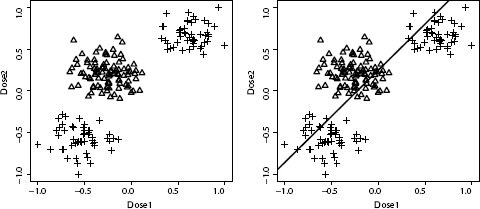

The image above on the right shows a simple linear logistic regression model trained to perform this task. This model is 

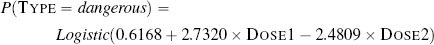

Plainly, this model is not performing well.

    a. Would the similarity-based, information-based, or probability-based predictive modeling approaches that have already been covered in this book be likely to do a better job of learning this model than the simple linear regression model?
    b. A simple approach to adapting a logistic regression model to learn this type of decision boundary is to introduce a set of basis functions that will allow a non-linear decision boundary to be learned. In this case, a set of basis functions that generate a cubic decision boundary will work well. An appropriate set of basis functions is as follows:

        ϕ0(〈DOSE1, DOSE2〉) = 1 ϕ1(〈DOSE1, DOSE2〉) = DOSE1
        ϕ2(〈DOSE1, DOSE2〉) = DOSE2 ϕ3(〈DOSE1, DOSE2〉) = DOSE12
        ϕ4(〈DOSE1, DOSE2〉) = DOSE22 ϕ5(〈DOSE1, DOSE2〉) = DOSE13
        ϕ6(〈DOSE1, DOSE2〉) = DOSE23 ϕ7(〈DOSE1, DOSE2〉) = DOSE1 × DOSE2
    
Training a logistic regression model using this set of basis functions leads to the following model:
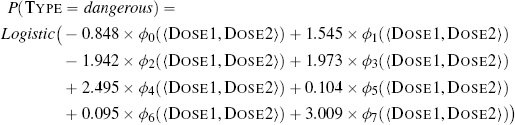

Use this model to make predictions for the following query instances:

|ID|DOSE1|DOSE2|
|---|---|---|
|1|0.50|0.75|
|2|0.10|0.75|
|3|-0.47|-0.39|
|4|-0.47|0.18|

#### Remark <br>
#### [a] Yes,  with a reasonable choice of k. Similarity-based predictive modeling approach (KNN) will be a good choice for this dataset.

### [b]

In [8]:
def calc_phi(dose1, dose2):
    """a simple function to calculate the interactions between features"""
    phi0 = 1
    phi1 = dose1
    phi2 = dose2
    phi3 = dose1 ** 2 
    phi4 = dose2 ** 2 
    phi5 = dose1 ** 3 
    phi6 = dose2 ** 3
    phi7 = dose1 * dose2
    return (phi0, phi1, phi2, phi3, phi4, phi5, phi6, phi7)

id1 = calc_phi(0.50, 0.75)
id2 = calc_phi(0.10, 0.75)
id3 = calc_phi(-0.47, -0.39)
id4 = calc_phi(-0.47, 0.18)

print(f'Phi functions: \nID 1 = {id1} \nID 2 = {id2} \nID 3 = {id3} \nID 4 = {id4}')

# predictions
id1 = -0.848 * id1[0] + 1.545 * id1[1] - 1.942 * id1[2] + 1.973 * id1[3] + 2.495 * id1[4] + 0.104 * id1[5] + 0.095 * id1[6] + 3.009 * id1[7]
id2 = -0.848 * id2[0] + 1.545 * id2[1] - 1.942 * id2[2] + 1.973 * id2[3] + 2.495 * id2[4] + 0.104 * id2[5] + 0.095 * id2[6] + 3.009 * id2[7]
id3 = -0.848 * id3[0] + 1.545 * id3[1] - 1.942 * id3[2] + 1.973 * id3[3] + 2.495 * id3[4] + 0.104 * id3[5] + 0.095 * id3[6] + 3.009 * id3[7]
id4 = -0.848 * id4[0] + 1.545 * id4[1] - 1.942 * id4[2] + 1.973 * id4[3] + 2.495 * id4[4] + 0.104 * id4[5] + 0.095 * id4[6] + 3.009 * id4[7]

print(f'\nBefore Logistics: \nID 1 = {id1} \nID 2 = {id2} \nID 3 = {id3} \nID 4 = {id4}')

id1 = logist_reg(id1)
id2 = logist_reg(id2)
id3 = logist_reg(id3)
id4 = logist_reg(id4)

print(f'\nPredictions: \nID 1 = {id1} \nID 2 = {id2} \nID 3 = {id3} \nID 4 = {id4}')

Phi functions: 
ID 1 = (1, 0.5, 0.75, 0.25, 0.5625, 0.125, 0.421875, 0.375) 
ID 2 = (1, 0.1, 0.75, 0.010000000000000002, 0.5625, 0.0010000000000000002, 0.421875, 0.07500000000000001) 
ID 3 = (1, -0.47, -0.39, 0.22089999999999999, 0.1521, -0.10382299999999998, -0.059319000000000004, 0.1833) 
ID 4 = (1, -0.47, 0.18, 0.22089999999999999, 0.0324, -0.10382299999999998, 0.0058319999999999995, -0.0846)

Before Logistics: 
ID 1 = 1.546140625 
ID 2 = -0.4609753749999998 
ID 3 = 0.5336720030000001 
ID 4 = -1.671841252

Predictions: 
ID 1 = 0.8243556190266934 
ID 2 = 0.3867544633206419 
ID 3 = 0.6303391403982059 
ID 4 = 0.1581788465228679
